In [6]:
import subprocess
import os
import time
import threading
import IPython.display as display
import ipywidgets as widgets

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


In [ ]:
# -----------------------
# SETTINGS
# -----------------------
script = "parallel_string_sizing.py"
log_file = "log.txt"

# -----------------------
# LAUNCH SCRIPT
# -----------------------
with open(log_file, "w") as logfile:
    process = subprocess.Popen(
        ["python", script],
        stdout=logfile,
        stderr=subprocess.STDOUT
    )

pid = process.pid
print(f"🚀 Script started with PID: {pid}. Output is logging to: {log_file}")

# -----------------------
# STOP BUTTON
# -----------------------
stop_btn = widgets.Button(description="🛑 Stop Script", button_style='danger')

def stop_script(b):
    process.terminate()
    print(f"🔴 Terminated script with PID {pid}")

stop_btn.on_click(stop_script)
display.display(stop_btn)

# -----------------------
# LIVE LOG DISPLAY (last 10 lines)
# -----------------------
log_output = widgets.Output()
display.display(log_output)

def update_log_display():
    while process.poll() is None:
        with log_output:
            log_output.clear_output(wait=True)
            try:
                with open(log_file, "r") as f:
                    lines = f.readlines()[-10:]
                    print("".join(lines))
            except:
                print("Waiting for log...")
        time.sleep(2)

# Start background thread to monitor log
threading.Thread(target=update_log_display, daemon=True).start()


In [4]:
# Load your simulation results
df = pd.read_csv("string_sizing_results.csv")

# Preview
df.sample(10)


,Module,Year,ModulesPerString,VocMax
239,JAM66D45-630/LB(3.2+2.0mm),2011,31,1586.81
409,JAM66D45-635/LB(3.2+2.0mm),2014,29,1474.77
422,JAM66D45-635/LB(3.2+2.0mm),2016,28,1413.62
251,JAM66D45-630/LB(3.2+2.0mm),2013,32,1610.70
59,JAM66D45-620/LB(3.2+2.0mm),2008,28,1388.74
485,JAM66D45-625/LB(3.2+2.0mm),2000,32,1583.97
468,JAM66D45-625/LB(3.2+2.0mm),1998,27,1344.97
103,JAM66D45-620/LB(3.2+2.0mm),2015,28,1395.14
283,JAM66D45-630/LB(3.2+2.0mm),2019,28,1402.37
410,JAM66D45-635/LB(3.2+2.0mm),2014,28,1423.92


In [ ]:
df["ExceedsLimit"] = df["VocMax"] > 1500


In [ ]:
# Create a pivot table of max Voc across all years
pivot = df.pivot_table(index='Module',
                       columns='ModulesPerString',
                       values='VocMax',
                       aggfunc='max')

# Optional: sort modules alphabetically
pivot = pivot.sort_index()


In [ ]:
# Add a helper column to highlight rows with any Voc > 1500V
pivot["Any_Over_1500V"] = (pivot > 1500).any(axis=1)


In [ ]:
pivot.to_csv("pivot_summary_by_module.csv")
print("✅ Saved: pivot_summary_by_module.csv")
pivot.head(10)


In [ ]:
# Load into DataFrame
import seaborn as sns
import matplotlib.pyplot as plt


# Set seaborn style
sns.set(style="darkgrid")

# FacetGrid with lineplot
g = sns.FacetGrid(df, col="Module", col_wrap=1, height=5, aspect=1.5)
g.map_dataframe(sns.lineplot, x="Year", y="VocMax", hue="ModulesPerString", palette="tab10", marker="o")

# Add legend and labels
g.add_legend(title="ModulesPerString")
g.set_titles(row_template="{row_name}")
g.set_axis_labels("Year", "VocMax")
plt.tight_layout()
plt.show()


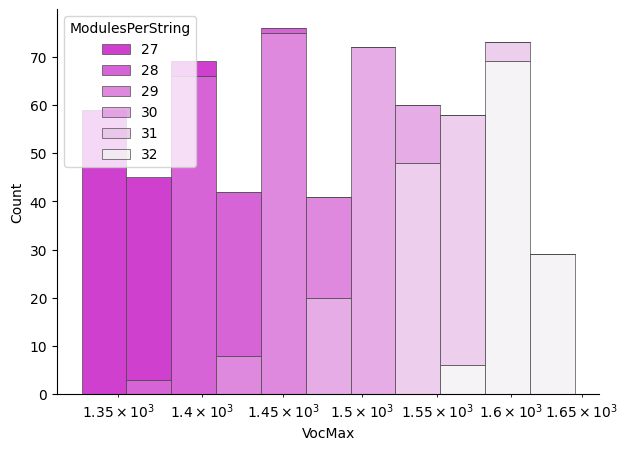

In [8]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    df,
    x="VocMax", hue="ModulesPerString",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
# ax.set_xticks([500, 1000, 2000, 5000, 10000])